In [21]:
import pandas as pd
import numpy as np
from scipy import stats

data = pd.read_csv('../datasets/students_simple.csv')
x = data['height'].values
y = data['income'].values
n = len(x)

print("# income, height")

print("1. КОРРЕЛЯЦИЯ ФЕХНЕРА")
print("Основана на знаках отклонений от среднего.")
print("Считает совпадения и несовпадения знаков.")
print("Формула: K = (C - H) / (C + H)")
print()

xm = np.mean(x)
ym = np.mean(y)

xi_xm = x - xm
yi_ym = y - ym

x_sign = np.sign(xi_xm)
y_sign = np.sign(yi_ym)

C = np.sum(x_sign == y_sign)
H = np.sum(x_sign != y_sign)

K_fechner = (C - H) / (C + H)

print(f"Среднее x: {xm:.2f}")
print(f"Среднее y: {ym:.2f}")
print(f"Совпадений (C): {C}")
print(f"Несовпадений (H): {H}")
print(f"Корреляция Фехнера: {K_fechner:.4f}")
print()

print("2. КОРРЕЛЯЦИЯ ПИРСОНА")
print("Учитывает величины отклонений от среднего.")
print("Измеряет линейную связь.")
print("Формула: K = cov(x,y) / (Sx * Sy)")
print()

cov_xy = np.sum(xi_xm * yi_ym) / (n - 1)

Sx = np.sqrt(np.sum(xi_xm**2) / (n - 1))
Sy = np.sqrt(np.sum(yi_ym**2) / (n - 1))

K_pearson = cov_xy / (Sx * Sy)

T_stat = K_pearson * np.sqrt(n - 2) / np.sqrt(1 - K_pearson**2)
p_value = 2 * (1 - stats.t.cdf(abs(T_stat), n - 2))

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, n - 2)
z = np.arctanh(K_pearson)
se_z = 1 / np.sqrt(n - 3)
z_lower = z - t_crit * se_z
z_upper = z + t_crit * se_z
ci_lower = np.tanh(z_lower)
ci_upper = np.tanh(z_upper)

print(f"Корреляция Пирсона: {K_pearson:.4f}")
print(f"95% доверительный интервал: [{ci_lower:.4f}, {ci_upper:.4f}]")
print()

print("3. КОРРЕЛЯЦИЯ СПИРМЕНА")
print("Ранговая корреляция - корреляция Пирсона для рангов.")
print("Устойчива к выбросам.")
print("Формула: корреляция Пирсона от R(x) и R(y)")
print()

rank_x = stats.rankdata(x)
rank_y = stats.rankdata(y)

rank_x_mean = np.mean(rank_x)
rank_y_mean = np.mean(rank_y)

rank_x_centered = rank_x - rank_x_mean
rank_y_centered = rank_y - rank_y_mean

numerator = np.sum(rank_x_centered * rank_y_centered)
denominator = np.sqrt(np.sum(rank_x_centered**2) * np.sum(rank_y_centered**2))

K_spearman = numerator / denominator

print(f"Корреляция Спирмена: {K_spearman:.4f}")
print()

print("4. КОРРЕЛЯЦИЯ КЕНДЕЛЛА")
print("Ранговая корреляция на основе конкордантных пар.")
print("Считает согласованность упорядочений.")
print("Формула: K = 1 - 4*D / (n*(n-1))")
print()

discordant = 0
for i in range(n-1):
    for j in range(i+1, n):
        if (x[i] < x[j]) != (y[i] < y[j]):
            discordant += 1

K_kendall = 1 - (4 * discordant) / (n * (n - 1))

print(f"Число несогласованных пар: {discordant}")
print(f"Корреляция Кенделла: {K_kendall:.4f}")
print()

print("СВОДКА РЕЗУЛЬТАТОВ")
print(f"Фехнера:  {K_fechner:.4f}")
print(f"Пирсона:  {K_pearson:.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Спирмена: {K_spearman:.4f}")
print(f"Кенделла: {K_kendall:.4f}")

print("Между ростом (height) и доходом (income) наблюдается очень слабая положительная связь. \n" \
    "Фехнера не обнаруживает связи вообще, остальные методы показывают слабую прямую (не обратную) зависимость - \n"
    "с ростом height немного увеличивается income, но эта связь настолько слаба, что практически не значима.")

# income, height
1. КОРРЕЛЯЦИЯ ФЕХНЕРА
Основана на знаках отклонений от среднего.
Считает совпадения и несовпадения знаков.
Формула: K = (C - H) / (C + H)

Среднее x: 170.85
Среднее y: 488.50
Совпадений (C): 10
Несовпадений (H): 10
Корреляция Фехнера: 0.0000

2. КОРРЕЛЯЦИЯ ПИРСОНА
Учитывает величины отклонений от среднего.
Измеряет линейную связь.
Формула: K = cov(x,y) / (Sx * Sy)

Корреляция Пирсона: 0.2277
95% доверительный интервал: [-0.2708, 0.6300]

3. КОРРЕЛЯЦИЯ СПИРМЕНА
Ранговая корреляция - корреляция Пирсона для рангов.
Устойчива к выбросам.
Формула: корреляция Пирсона от R(x) и R(y)

Корреляция Спирмена: 0.1044

4. КОРРЕЛЯЦИЯ КЕНДЕЛЛА
Ранговая корреляция на основе конкордантных пар.
Считает согласованность упорядочений.
Формула: K = 1 - 4*D / (n*(n-1))

Число несогласованных пар: 89
Корреляция Кенделла: 0.0632

СВОДКА РЕЗУЛЬТАТОВ
Фехнера:  0.0000
Пирсона:  0.2277 [-0.2708, 0.6300]
Спирмена: 0.1044
Кенделла: 0.0632
Между ростом (height) и доходом (income) наблюдается очень сла

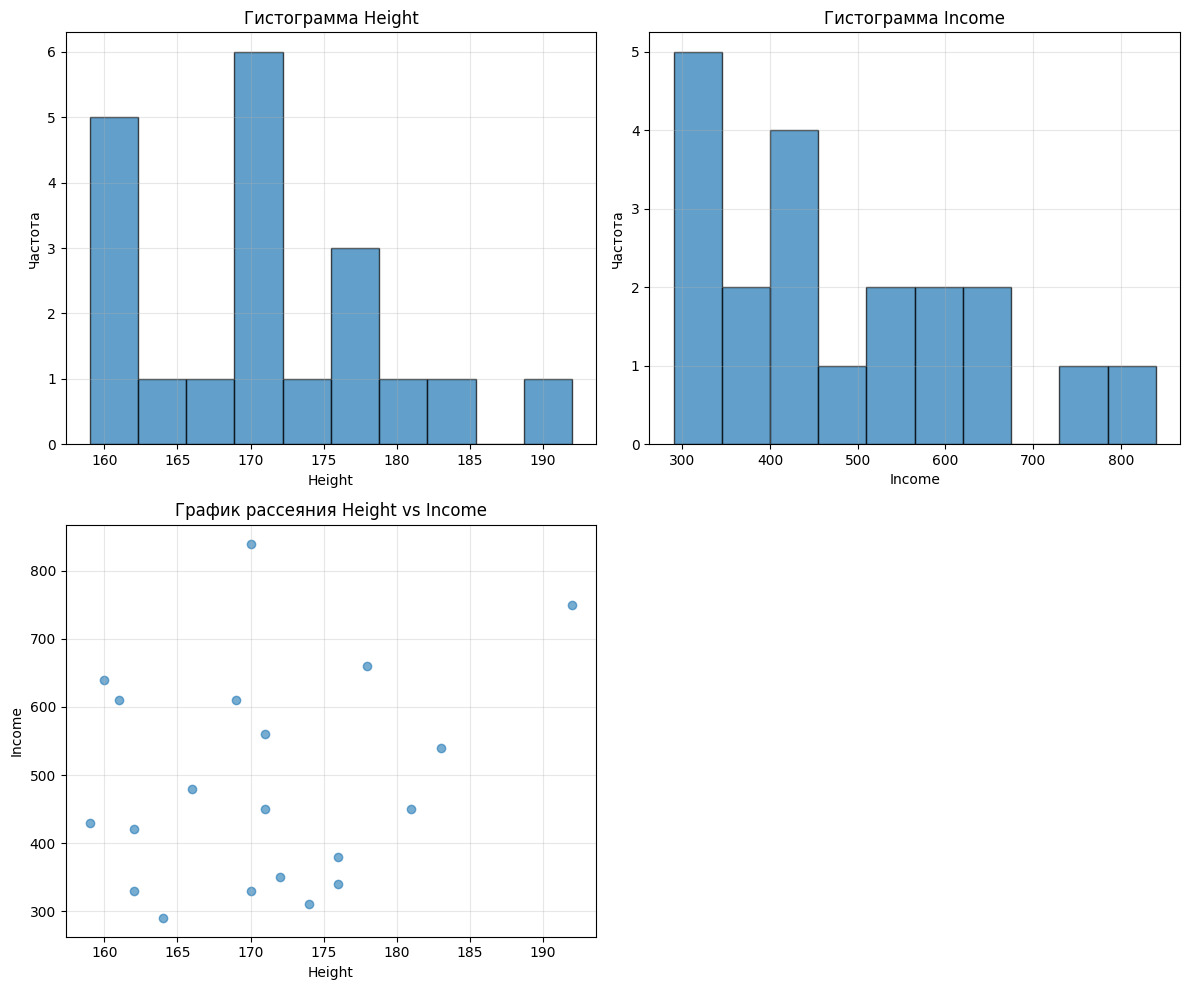

('Гистограммы: Распределение height близко к нормальному, с концентрацией '
 'значений в центре (около 170-175). Распределение income более неравномерное, '
 'с несколькими пиками, что указывает на неоднородность данных по доходу.\n'
 'График рассеяния: Показывает слабую положительную (прямую) зависимость между '
 'height и income. Точки расположены достаточно хаотично, без четкой линейной '
 'структуры, что подтверждает слабую корреляцию, полученную ранее (Пирсона = '
 '0.2277). Явной обратной зависимости не наблюдается - скорее есть небольшая '
 'тенденция роста income с увеличением height')


In [22]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(x, bins=10, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Height')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Гистограмма Height')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(y, bins=10, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Гистограмма Income')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].scatter(x, y, alpha=0.6)
axes[1, 0].set_xlabel('Height')
axes[1, 0].set_ylabel('Income')
axes[1, 0].set_title('График рассеяния Height vs Income')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

a = """Гистограммы: Распределение height близко к нормальному, с концентрацией значений в центре (около 170-175). Распределение income более неравномерное, с несколькими пиками, что указывает на неоднородность данных по доходу.
График рассеяния: Показывает слабую положительную (прямую) зависимость между height и income. Точки расположены достаточно хаотично, без четкой линейной структуры, что подтверждает слабую корреляцию, полученную ранее (Пирсона = 0.2277). Явной обратной зависимости не наблюдается - скорее есть небольшая тенденция роста income с увеличением height"""
import pprint
pprint.pprint(a)

Коэффициенты регрессий:
Линейная: [   4.15943736 -222.13987362]
Квадратичная: [ 5.35176833e-01 -1.81479059e+02  1.58350569e+04]
Гиперболическая: [-113891.48229277    1156.67835843]
Логарифмическая: [  1.00785346 122.43228503]

Линейная: R² = 0.0519, F = 0.9845
Квадратичная: R² = 0.1494, F = 1.4927
Гиперболическая: R² = 0.0437, F = 0.8218
Логарифмическая: R² = 0.0368, F = 0.6875



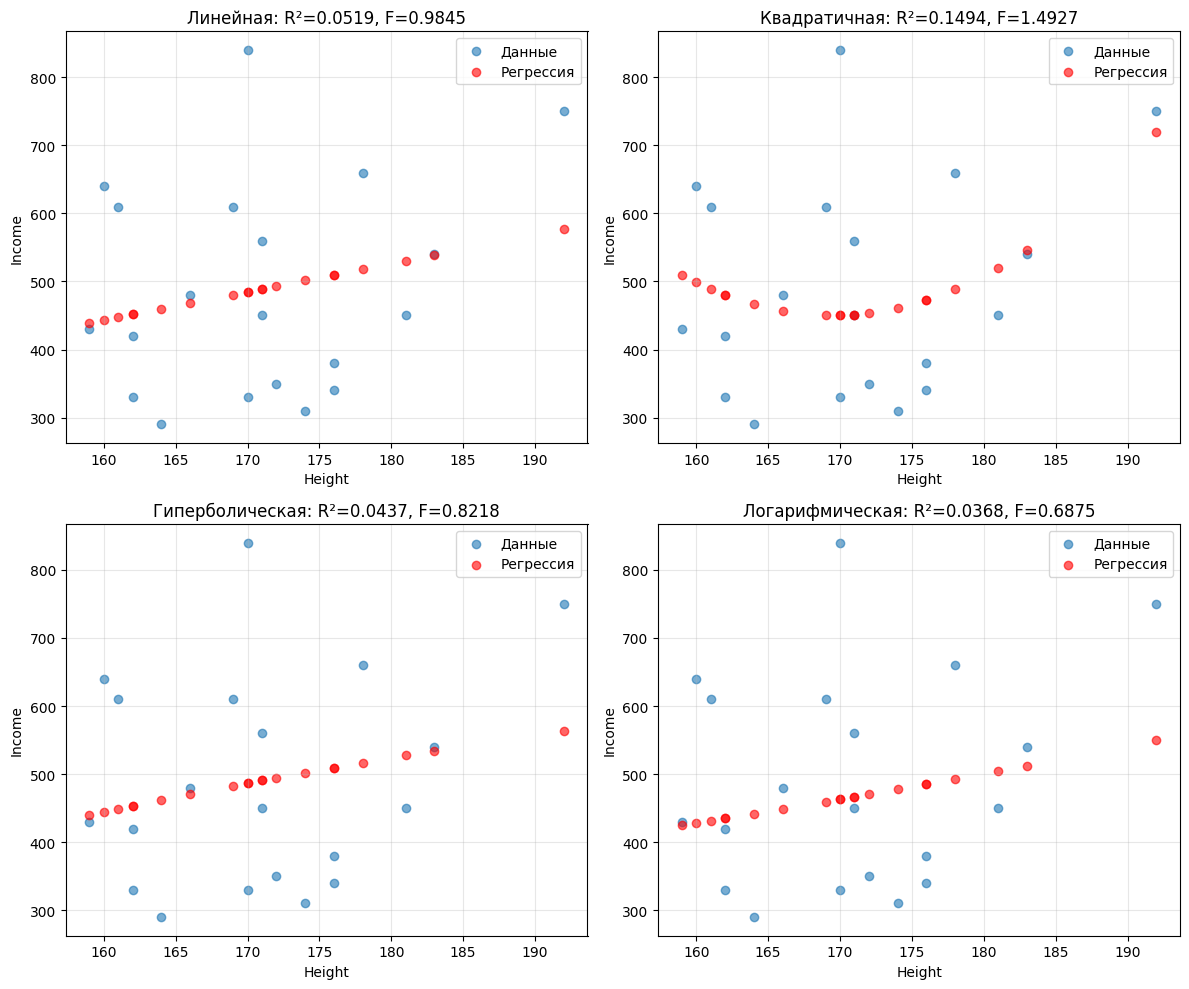

In [ ]:
def linear(x, y):
    X = np.column_stack((x, np.ones_like(x)))
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    y_pred = X @ w
    return w, y_pred

def quadratic(x, y):
    X = np.column_stack((x**2, x, np.ones_like(x)))
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    y_pred = X @ w
    return w, y_pred

def hyper(x, y):
    X = np.column_stack((1 / x, np.ones_like(x)))
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    y_pred = X @ w
    return w, y_pred

def logarifm(x, y):
    y_log = np.log(y)
    X = np.column_stack((x, np.ones_like(x)))
    w = np.linalg.lstsq(X, y_log, rcond=None)[0]
    return np.exp(w), np.exp(X @ w)

w_lin, pred_y_lin = linear(x, y)
w_quad, pred_y_quad = quadratic(x, y)
w_hyp, pred_y_hyp = hyper(x, y)
w_log, pred_y_log = logarifm(x, y)

print("Коэффициенты регрессий:")
print(f"Линейная: {w_lin}")
print(f"Квадратичная: {w_quad}")
print(f"Гиперболическая: {w_hyp}")
print(f"Логарифмическая: {w_log}")
print()

def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

def calculate_f_statistic(r2, n, k):
    return (r2 / (1 - r2)) * ((n - k) / (k - 1))

r2_lin = calculate_r2(y, pred_y_lin)
f_lin = calculate_f_statistic(r2_lin, n, 2)
print(f"Линейная: R² = {r2_lin:.4f}, F = {f_lin:.4f}")

r2_quad = calculate_r2(y, pred_y_quad)
f_quad = calculate_f_statistic(r2_quad, n, 3)
print(f"Квадратичная: R² = {r2_quad:.4f}, F = {f_quad:.4f}")

r2_hyp = calculate_r2(y, pred_y_hyp)
f_hyp = calculate_f_statistic(r2_hyp, n, 2)
print(f"Гиперболическая: R² = {r2_hyp:.4f}, F = {f_hyp:.4f}")

r2_log = calculate_r2(y, pred_y_log)
f_log = calculate_f_statistic(r2_log, n, 2)
print(f"Логарифмическая: R² = {r2_log:.4f}, F = {f_log:.4f}")
print()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(x, y, alpha=0.6, label='Данные')
axes[0, 0].scatter(x, pred_y_lin, color='red', alpha=0.6, label='Регрессия')
axes[0, 0].set_xlabel('Height')
axes[0, 0].set_ylabel('Income')
axes[0, 0].set_title(f'Линейная: R²={r2_lin:.4f}, F={f_lin:.4f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].scatter(x, y, alpha=0.6, label='Данные')
axes[0, 1].scatter(x, pred_y_quad, color='red', alpha=0.6, label='Регрессия')
axes[0, 1].set_xlabel('Height')
axes[0, 1].set_ylabel('Income')
axes[0, 1].set_title(f'Квадратичная: R²={r2_quad:.4f}, F={f_quad:.4f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

axes[1, 0].scatter(x, y, alpha=0.6, label='Данные')
axes[1, 0].scatter(x, pred_y_hyp, color='red', alpha=0.6, label='Регрессия')
axes[1, 0].set_xlabel('Height')
axes[1, 0].set_ylabel('Income')
axes[1, 0].set_title(f'Гиперболическая: R²={r2_hyp:.4f}, F={f_hyp:.4f}')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(x, y, alpha=0.6, label='Данные')
axes[1, 1].scatter(x, pred_y_log, color='red', alpha=0.6, label='Регрессия')
axes[1, 1].set_xlabel('Height')
axes[1, 1].set_ylabel('Income')
axes[1, 1].set_title(f'Логарифмическая: R²={r2_log:.4f}, F={f_log:.4f}')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# По критерию Фишера все регрессии показывают низкие значения F-статистики (все < 4),
# что говорит о слабой значимости моделей. Однако среди представленных моделей:

# Наилучшая - квадратичная регрессия (R² = 0.1494, F = 1.4927), она объясняет ~15% вариации данных
# Наихудшая - логарифмическая регрессия (R² = 0.0368, F = 0.6875), объясняет только ~4% вариации
# Линейная и гиперболическая модели показывают промежуточные результаты (R² около 0.05).

# В целом, все модели имеют очень низкое качество аппроксимации,
# что подтверждает слабую связь между ростом (height) и доходом (income) в данной выборке.

